<a href="https://colab.research.google.com/github/gabrielfreire08/gabrielfreire08/blob/main/Multi_label_prediction_with_Planet_Amazon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-label prediction with Planet Amazon dataset

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/FastAI-Code-Collection/blob/v1/Multi_label_prediction_with_Planet_Amazon_dataset.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/FastAI-Code-Collection/blob/v1/Multi_label_prediction_with_Planet_Amazon_datase">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

In [1]:
!pip install fastai==1.0.61

In [2]:
from fastai.vision import *

## Get data

In [3]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 4.2 MB 29.6 MB/s 
     |████████████████████████████████| 112 kB 81.8 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 149 kB 89.3 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-0f9widbk/lxml_0dc78f76c3ba4138816da819fb10f8ae/setup.py'"'"'; __file__='"'"'/tmp/pip-install-0f9widbk/lxml_0dc78f76c3ba4138816da819fb10f8ae/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-y5t_atsf/install-record.txt --s

In [4]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "gabrielfreireluna" 
os.environ['KAGGLE_KEY'] = "481cdeeeed9c69a116e00d13274c6991"

In [5]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [6]:
! kaggle datasets download nikitarom/planets-dataset -p "{path}"
! unzip -q -n '{path}'/planets-dataset.zip -d '{path}' 

 99% 1.48G/1.50G [00:22<00:00, 65.7MB/s]
100% 1.50G/1.50G [00:22<00:00, 71.1MB/s]


In [7]:
path = path/'planet/planet'

In [9]:
df = pd.read_csv(path/'train_classes.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [10]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [13]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_classes.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [14]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

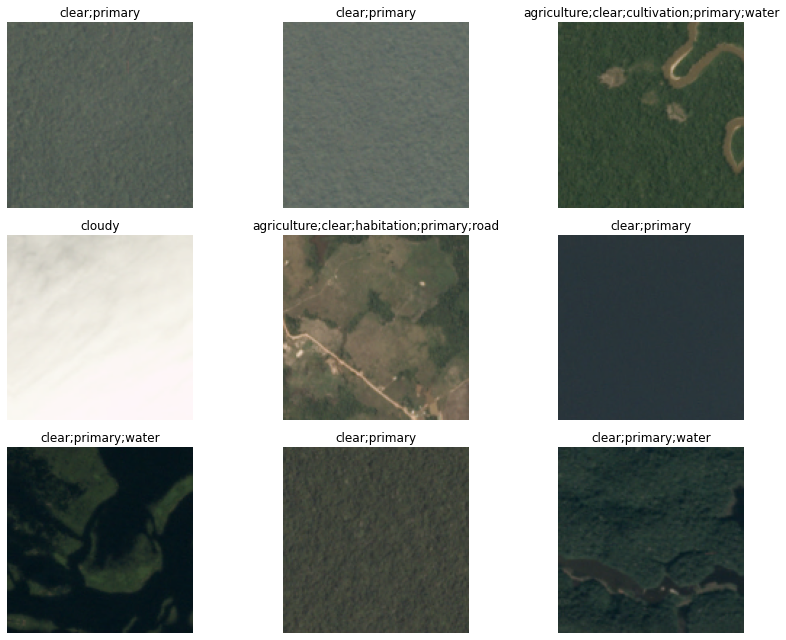

In [15]:
data.show_batch(rows=3, figsize=(12, 9))

## Training

In [16]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, models.resnet50, metrics=[acc_02, f_score])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# learn

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken p

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [ ]:
learn.recorder.plot()

In [ ]:
lr = 0.01
learn.fit_one_cycle(5, slice(lr))

In [ ]:
learn.save('planet-amazon-stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [ ]:
learn.save('planet-amazon-stage-2')

In [ ]:
# switch resolution
data = (src.transform(tfms, size=256)
        .databunch(bs=16).normalize(imagenet_stats))
learn.data = data
data.train_ds[0][0].shape

In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=1e-2/2
learn.fit_one_cycle(5, slice(lr))

In [ ]:
learn.save('planet-amazon-stage-3')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [ ]:
learn.save('planet-amazon-stage-4')

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.export()